#**UNIVERSIDADE FEDERAL DA PARAÍBA**
#**CENTRO DE INFORMÁTICA**
#**DEPARTAMENTO DE COMPUTAÇÃO CIENTÍFICA**
## PROJETO FINAL $\;$ - $\;$ PROCESSAMENTO DE LINGUAGEM NATURAL
## DOCENTE: YURI MALHEIROS
---
$\;\;\;\;\;\;\;\;$**Aluno / Matrícula:**
* José Jesus Andrade/ 20190100030
* Matheus Victor Maciel / 20200025508
* Gabriel de Lucca Vieira/ 20180042775

---
**[PDF do Projeto Final](https://drive.google.com/file/d/1ccvLsDXM7HWpZVuguWdn5P_AJKu9BKW8/view?usp=sharing)**

In [ ]:
import pandas as pd

In [ ]:
# Criação dos datasets
fake = pd.read_csv('/content/Fake.csv')
true = pd.read_csv('/content/True.csv')

In [ ]:
# Adicionando coluna label para classificação
fake["label"] = 1
true["label"] = 0

In [ ]:
# Criação do dataset que será utilizado no projeto
df_fn = pd.concat([fake, true], ignore_index = True)
df_fn.head(5)

In [ ]:
df_fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

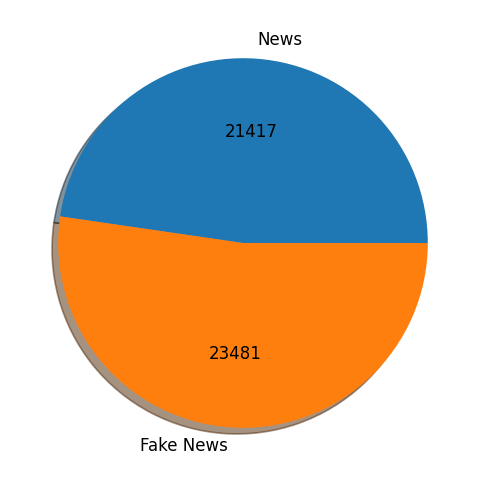

In [ ]:
# Não temos valores NaN/Null na coluna label

labels = 'News', 'Fake News',
sizes = np.array([len(df_fn[df_fn['label'] == 0]), len(df_fn[df_fn['label'] == 1])])

def absolute_value(val):
    a  = int((val/100)*sizes.sum())
    return a

fig, ax = plt.subplots(dpi=120, figsize=(12.5, 5))
plt.pie(sizes, labels=labels, autopct=absolute_value, shadow=True)

plt.show()

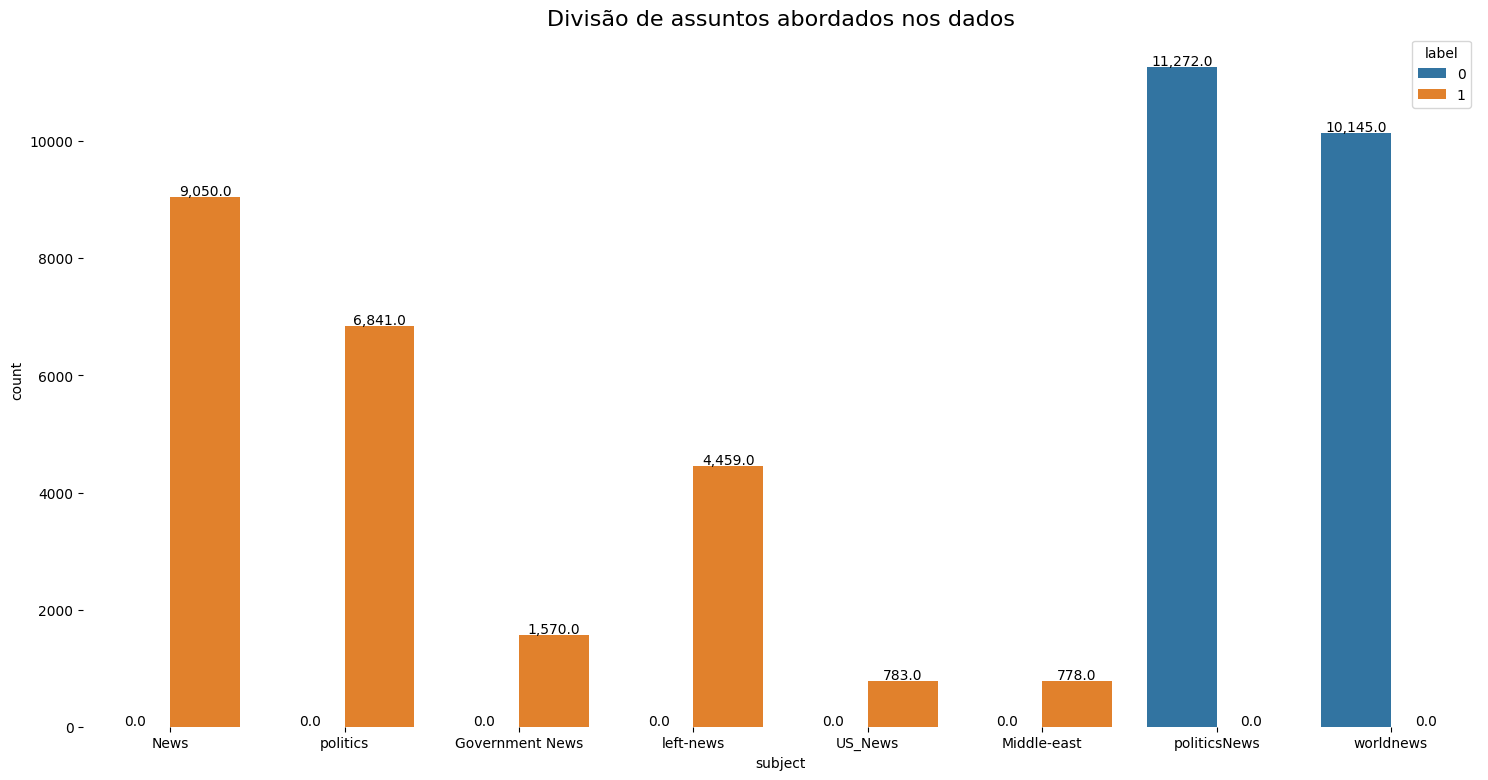

In [ ]:
plt.figure(figsize=(18, 9))
a = sns.countplot(data= df_fn, x='subject', hue='label')

for p in a.patches:
    a.annotate(format(p.get_height(), ','),
           (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center',
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Divisão de assuntos abordados nos dados', fontsize=16)
sns.despine(left=True, bottom=True);

In [ ]:
# Verificando temas mais presentes no dados
df_fn['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
# Combinando título e texto
df_fn['text'] = df_fn['title'] + " " + df_fn['text']

del df_fn['title']
del df_fn['subject']
del df_fn['date']

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [ ]:
# Definindo stopwords e corrigindo pontuação
stopwords = set(stopwords.words('english'))
# Definindo a pontuação
punctuation = list(string.punctuation)
# Atualizando as stopwords com a pontuação
stopwords.update(punctuation)

In [ ]:
# Importando biblioteca re para remoção de símbolos e urls
import re

In [ ]:
# Removendo símbolos
def remove_simbolos(text):
    return re.sub('\[[^]]*\]', '', text)

# Removendo urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [ ]:
# Removendo stopwords
def remove_stopwords(text):
    final_text = []
    text = text.lower()
    for i in text.split():
        if i.strip() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# Removendo ruido dos textos
def remove_ruido(text):
    text = remove_simbolos(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    return text

# Aplicando função ao dataset
df_fn['text']=df_fn['text'].apply(remove_ruido)
df_fn['text']

0        donald trump sends embarrassing new year’s eve...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obama’s name coded website...
4        pope francis called donald trump christmas spe...
                               ...                        
44893    'fully committed' nato backs new u.s. approach...
44894    lexisnexis withdrew two products chinese marke...
44895    minsk cultural hub becomes authorities minsk (...
44896    vatican upbeat possibility pope francis visiti...
44897    indonesia buy $1.14 billion worth russian jets...
Name: text, Length: 44898, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Inicia a Lematização
lemmatizer = WordNetLemmatizer()

# Função para substituir frases do texto por sua versão lematizada
def lemmatize_text(text):
    token_words=word_tokenize(text)

# Tokenizando as frases
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

# Aplicando a função aos dados
df_fn['text']=df_fn['text'].apply(lemmatize_text)
df_fn['text'].head()

0    donald trump sends embarrassing new year ’ s e...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama ’ s name coded websi...
4    pope francis called donald trump christmas spe...
Name: text, dtype: object

In [ ]:
# Encontrando n-gramas
texts = ''.join(str(df_fn['text'].tolist()))

tokenized = texts.split()

Text(0.5, 0, '# of Occurances')

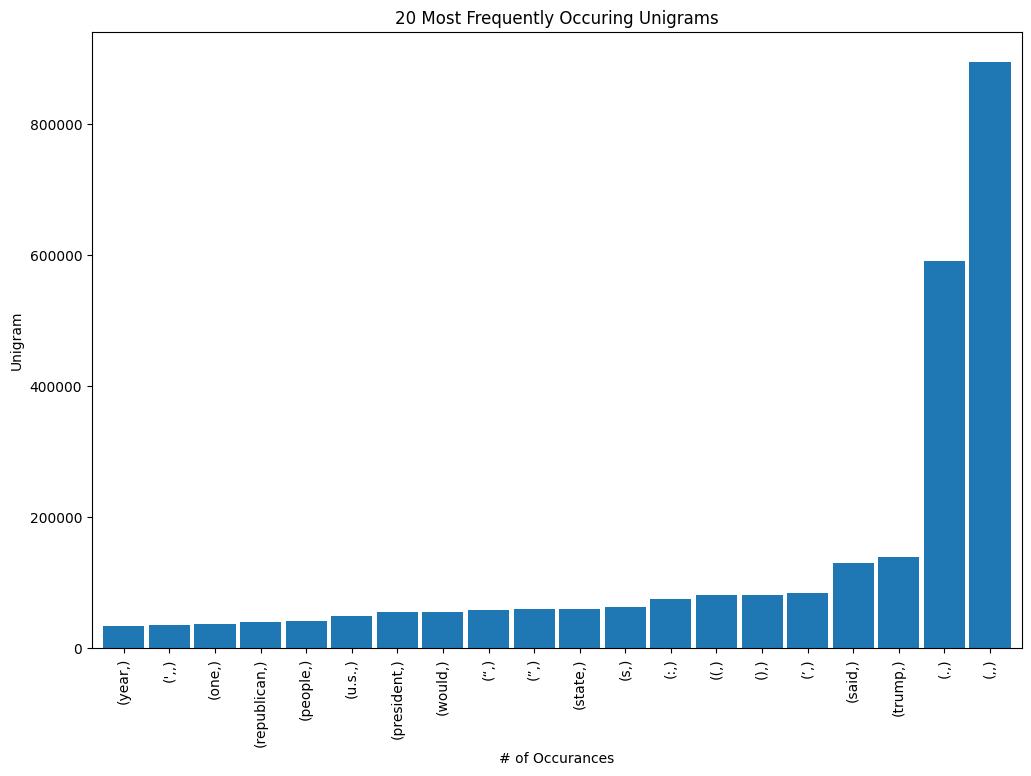

In [ ]:
# Verificando unigramas
unigramas = (pd.Series(nltk.ngrams(tokenized, 1)).value_counts())[:20]
unigramas.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

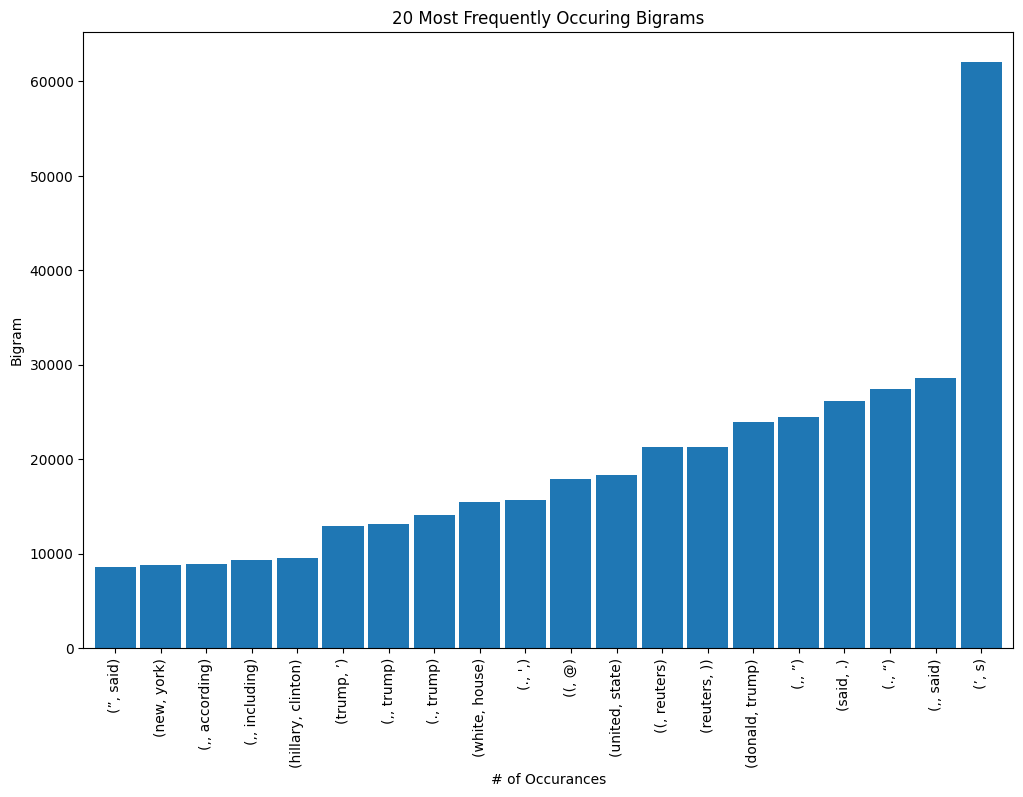

In [ ]:
# Verificando bigramas
bigramas = (pd.Series(nltk.ngrams(tokenized, 2)).value_counts())[:20]
bigramas.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

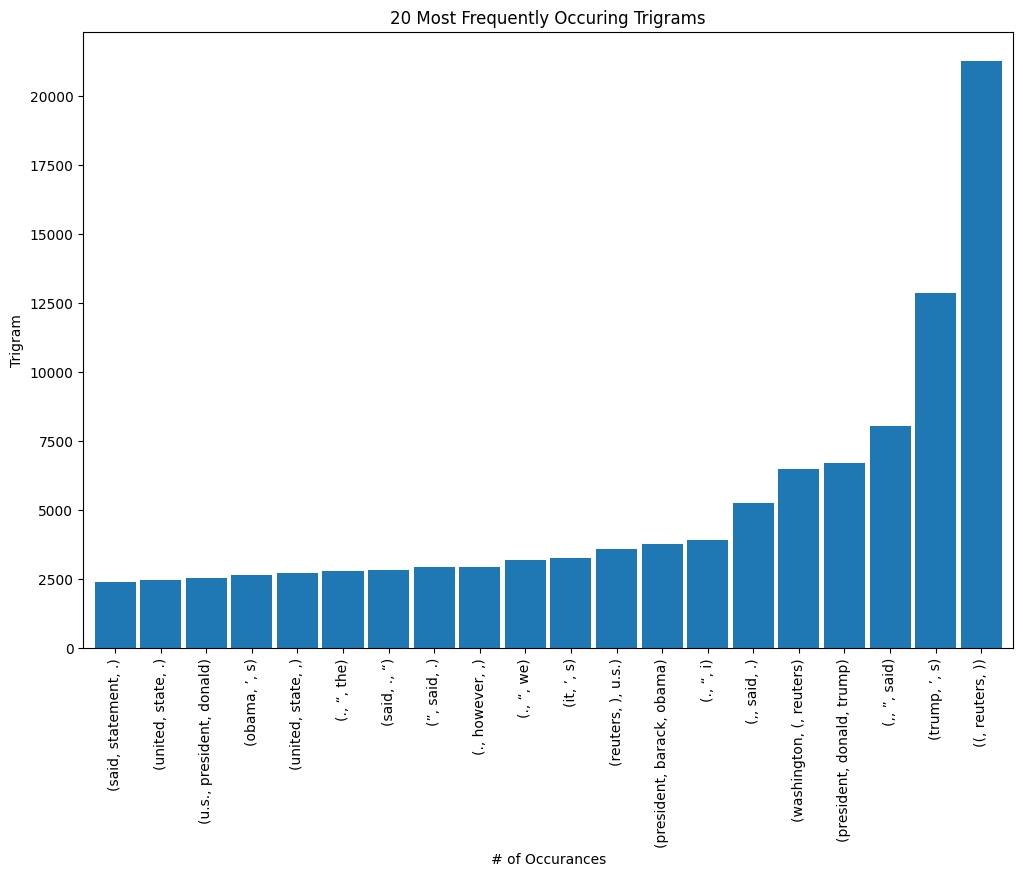

In [ ]:
# Verificando trigramas
trigramas = (pd.Series(nltk.ngrams(tokenized, 3)).value_counts())[:20]
trigramas.sort_values().plot.bar(width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

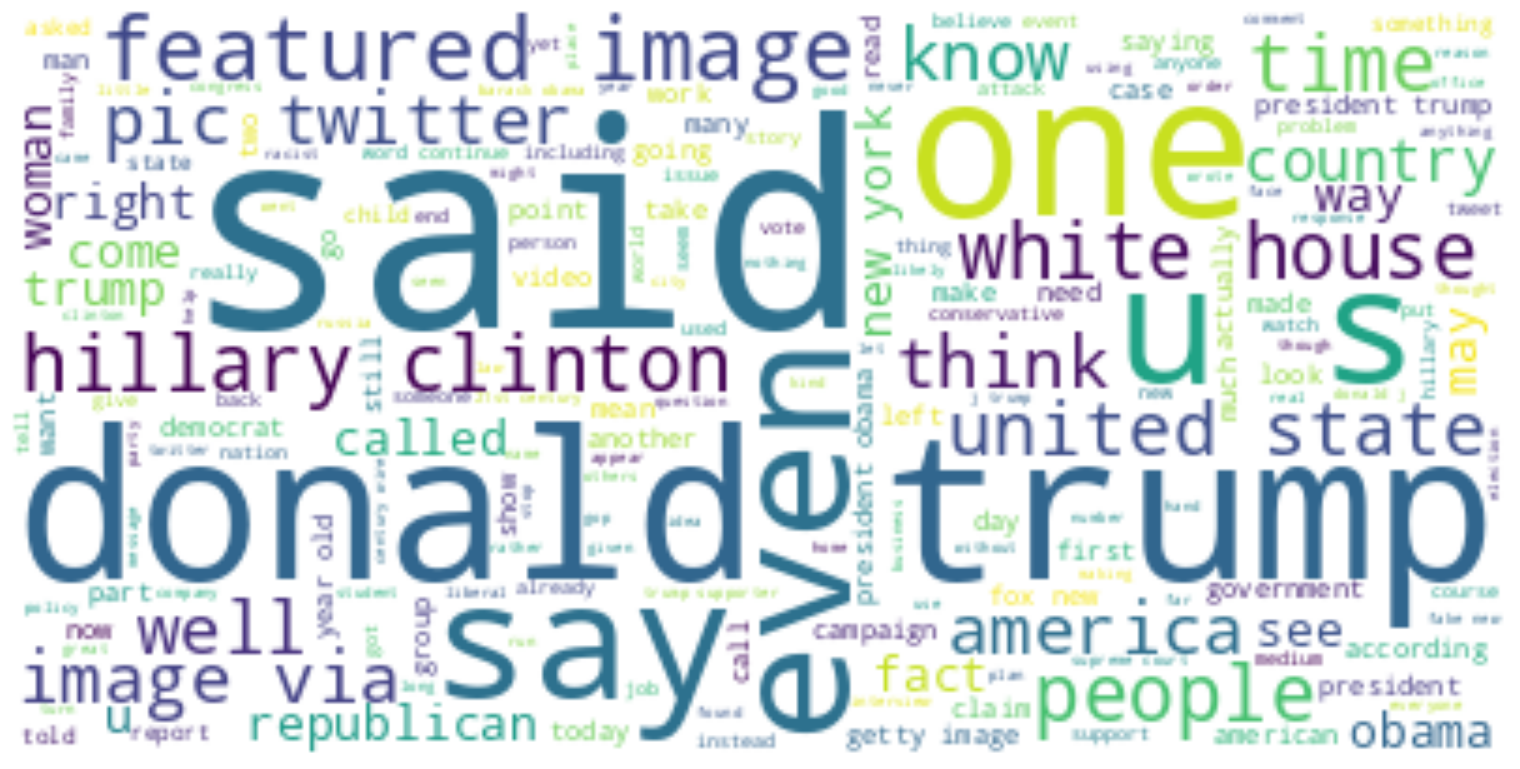

In [ ]:
# Apresentação WordCloud para os dados falsos
view_f = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df_fn[df_fn.label == 1].text))
plt.figure(figsize=(15, 18))
plt.imshow(view_f, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

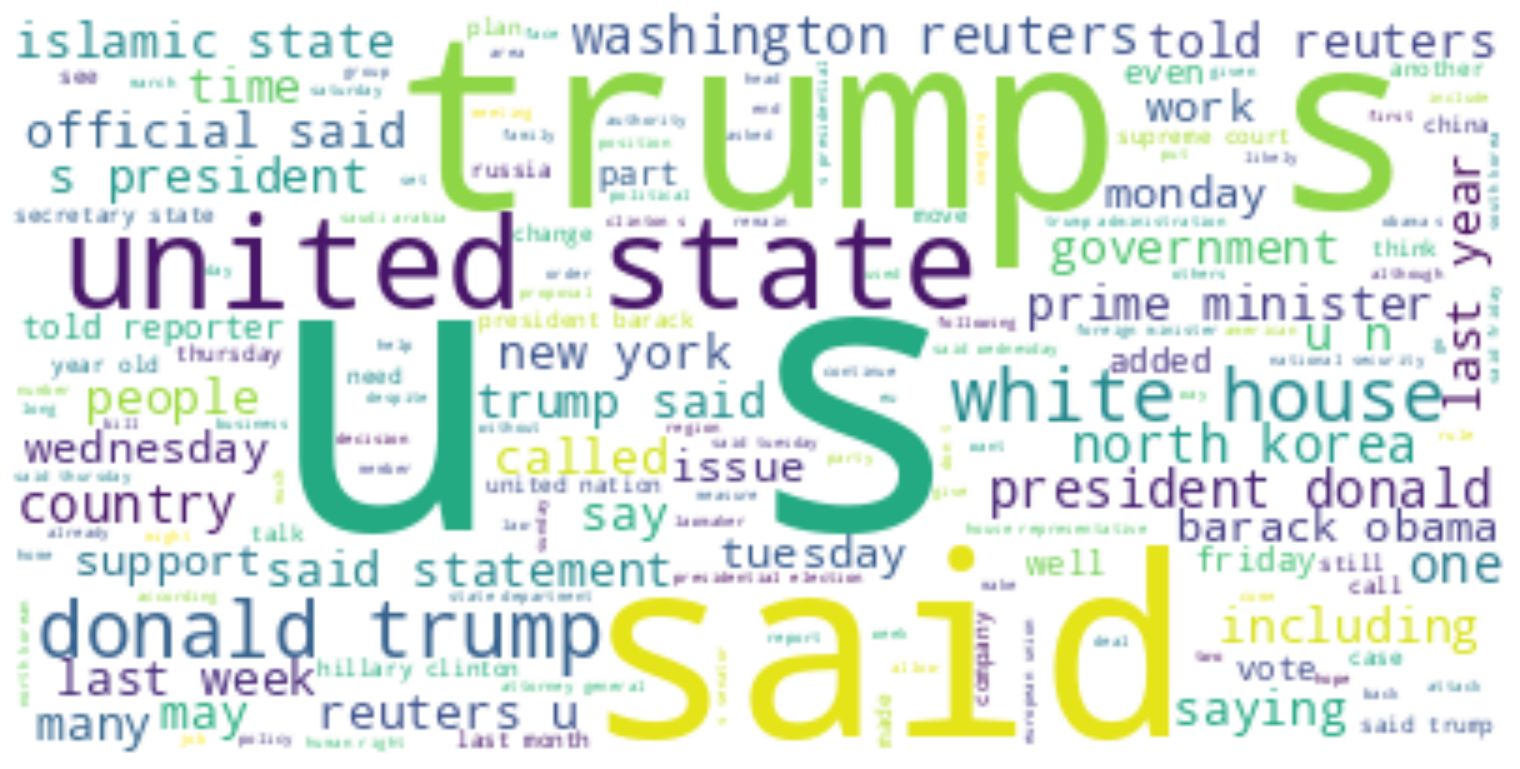

In [ ]:
# Apresentação WordCloud para os dados verdadeiros
view_t = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df_fn[df_fn.label == 0].text))
plt.figure(figsize=(15, 18))
plt.imshow(view_t, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vetorizando
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_fn['text'])
y = df_fn['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df_fn['label'], test_size = 0.3, random_state= 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Criando o classificador Random Forest
rfc = RandomForestClassifier()
modelo_rf = rfc.fit(X_train, y_train)

In [ ]:
# Construindo um modelo a partir do classificador Random Forest
predito = modelo_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

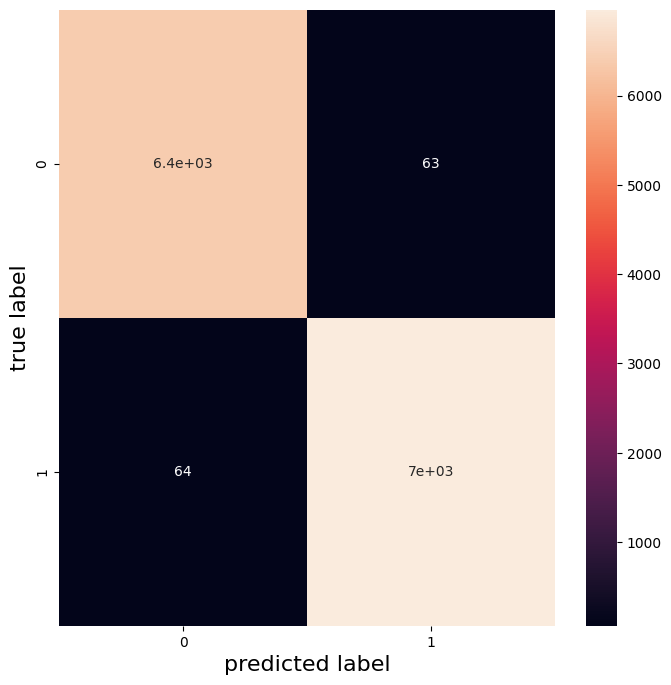

In [ ]:
# Printando a matriz de confusão do Random Forest
plt.figure(figsize = (8, 8))
mc = confusion_matrix(y_test, predito)
sns.heatmap(mc, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

In [ ]:
# Relatório de classficação Random Forest
print(classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6445
           1       0.99      0.99      0.99      7025

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Definindo a Regressão Logística
def train_classifier(X, y, C=2.5, penalty='l2'):

    # Instanciando a regressão logística
    reg_lin = LogisticRegression(C=C, penalty=penalty, max_iter=2000)
    # Instanciando modelo 1vstodos
    um_vs_todos = OneVsRestClassifier(reg_lin).fit(X, y)

    # Retorando a instancia 1vstodos
    return um_vs_todos

In [ ]:
# Treinando modelo de regressão
modelo_rl = train_classifier(X_train, y_train)

In [ ]:
# Construindo um modelo a partir da regressão logística
preditos = modelo_rl.predict(X_test)

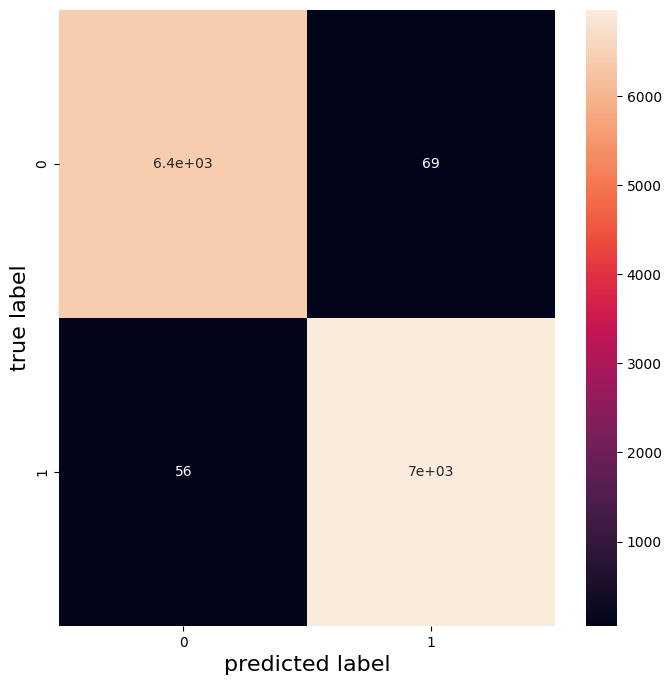

In [ ]:
# Matriz de Confusão com a Regressão Linear
plt.figure(figsize = (8, 8))
mc = confusion_matrix(y_test, preditos)
sns.heatmap(mc, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

In [ ]:
# Relatório de classficação Regressão Linear
print(classification_report(y_test, preditos))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6445
           1       0.99      0.99      0.99      7025

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
# Dividindo em teste e treino
news_train, news_test, text_train, text_test = train_test_split(df_fn['text'], df_fn['label'], test_size=0.3)

In [ ]:
# Criando o pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier()),
    ])
pipeline.fit(news_train,text_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Construindo modelo a partir do pipeline
prediction = pipeline.predict(news_test)

In [ ]:
 # Printando acurácia do modelo pipeline
print(classification_report(prediction,text_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6374
           1       0.99      0.99      0.99      7096

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

